# DBSCAN Algorithm 
*Alna Eldhose*
and
*Danial Monachan*

In [11]:
#pip install scikit-image

In [12]:
#pip install numba

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io
from scipy.spatial import KDTree
import numpy as np
import matplotlib.pyplot as plt
# importing the DBSCAN Function
#from DBSCAN_algorithm import dbscan 
import sys


# function to calculate distance between two datapoints
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))



# DBSCAN function
def dbscan(image, eps, min_samples):
    
    pixels = np.array(image).reshape(-1, 3)
    n_points = pixels.shape[0]
    labels = np.zeros(n_points)
    # checks whether the data pointy was already visited or not
    visited = [False] * n_points
    #initialize the cluster counter
    c = 0
    #The KDTree is used to efficiently find the neighbors of a given pixel within a specified radius, 
    #which is used in the DBSCAN algorithm for clustering the pixels.
    kdt = KDTree(pixels)
    for point_idx in range(n_points):
        if visited[point_idx]:
            continue
        visited[point_idx] = True
        point = pixels[point_idx]
        
        #The query_ball_point method returns a list of indices of the neighboring pixels within the specified radius.
        neighbors = kdt.query_ball_point(point, eps)
        
        # the following is the important part of the entire Algorith where the data point is grouped and categorised as outlier, or 
        # as a core point and also check for which cluster the new data point is to be added is also done here.
        if len(neighbors) < min_samples:
            labels[point_idx] = -1
        else:
            c += 1
            labels[point_idx] = c
            for neighbor_idx in neighbors:
                if visited[neighbor_idx]:
                    continue
                visited[neighbor_idx] = True
                neighbor = pixels[neighbor_idx]
                neighbor_neighbors = kdt.query_ball_point(neighbor, eps)
                if len(neighbor_neighbors) >= min_samples:
                    for i in neighbor_neighbors:
                        if i not in neighbors:
                            neighbors.append(i)
                if labels[neighbor_idx] == -1:
                    labels[neighbor_idx] = c
    return labels.reshape(*image.shape[:2])

def Image_develop(vctrs: list):
    len_of_vec = len(vctrs[0][0])
    if len_of_vec == 3:
        image = Image.new('RGB', (len(vctrs[0]),len(vctrs)))
    elif len_of_vec == 4:
        image = Image.new('RGBA', (len(vctrs[0]),len(vctrs)))
    else:
        print("Unsupported model")
        sys.exit(1)
    pixel = image.load()
    for y in range(len(vctrs)):
        for x in range(len(vctrs[0])):
            r = int(round(vctrs[y][x][0]))
            g = int(round(vctrs[y][x][1]))
            b = int(round(vctrs[y][x][2]))
            if len_of_vec == 3:
                pixel[x,y] = (r,g,b)
            elif len_of_vec == 4:
                a = int(round(vctrs[y][x][3]))
                pixel[x,y] = (r,g,b,a)        
    return image

def Display_img(Image,Alg):
    %matplotlib inline
    plt.title(Alg+'Clustered Output')
    plt.imshow(np.asarray(Image))
 

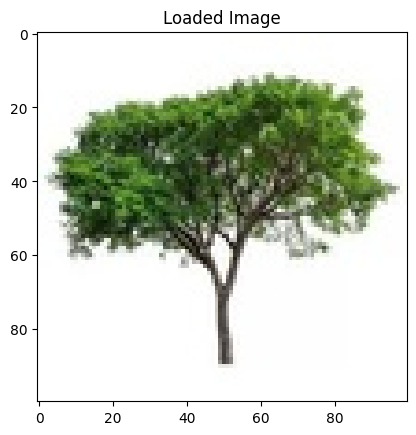

In [9]:
image_path = "C:/Users/As/Desktop/DM1/image_scaled_opt.jpg"
image = Image.open(image_path)
pixels = image.load()
width, height = image.size


# Display image in notebook:
%matplotlib inline
plt.title('Loaded Image')
plt.imshow(np.asarray(image))

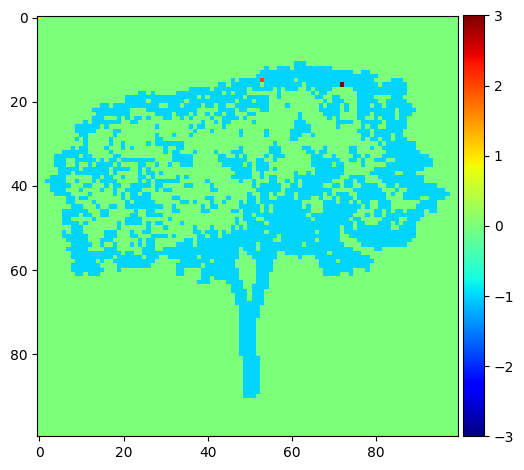

In [10]:
# The following calls the predifined Clustering DBSCAN algorithm and Performs clustering on the vectors:
#from untitled import dbscan 

image = io.imread('image_scaled_opt.jpg')
clustered_image = dbscan(image, eps=10, min_samples=100)
io.imshow(clustered_image, cmap='jet')
io.show()
#dbscan_clusters = dbscan(vector_list, eps=100,min_samples=100 )
#Display_img(Image_develop(dbscan_clusters),"DBScan")    

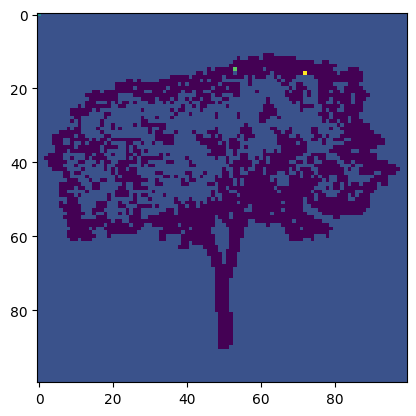

In [13]:
plt.imshow(np.asarray(clustered_image))

In [16]:
Display_img(Image_develop(clustered_image),"DBScan")   

TypeError: object of type 'numpy.float64' has no len()